<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Decision Trees

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [82]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

/bin/bash: wget: command not found


**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


Now, read data using pandas dataframe:


In [73]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [74]:
my_data['Sex'].replace(to_replace=['M','F'], value=[1,0],inplace=True)
my_data.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


In [75]:
my_data['Cholesterol'].replace(to_replace=['HIGH','NORMAL'], value=[1,0],inplace=True)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,drugY
1,47,1,LOW,1,13.093,drugC
2,47,1,LOW,1,10.114,drugC
3,28,0,NORMAL,1,7.798,drugX
4,61,0,LOW,1,18.043,drugY


In [76]:
#my_data = pd.concat([my_data,pd.get_dummies(my_data['BP'])], axis=1)
#my_data
my_data['BP'].replace(to_replace=['HIGH','LOW','NORMAL'], value=[0,1,2],inplace=True)
my_data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,drugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,0,14.020,drugX


In [67]:
#my_data.drop(['BP'], axis = 1,inplace=True)
#my_data

In [68]:
#my_data=pd.concat([Feature,pd.get_dummies(df['Drug'])], axis=1)
my_data['Drug'].replace(to_replace=['drugA','drugB','drugC','drugX','drugY'], value=[1,2,3,4,5],inplace=True)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,5
1,47,1,1,1,13.093,3
2,47,1,1,1,10.114,3
3,28,0,2,1,7.798,4
4,61,0,1,1,18.043,5
...,...,...,...,...,...,...
195,56,0,1,1,11.567,3
196,16,1,1,1,12.006,3
197,52,1,2,1,9.894,4
198,23,1,2,0,14.020,4


In [77]:
#Feature = my_data[['Age','Sex','Cholesterol','Na_to_K','HIGH','LOW','NORMAL']]
Feature = my_data[['Age','Sex','Cholesterol','Na_to_K','BP']]


Feature

,Age,Sex,Cholesterol,Na_to_K,BP
0,23,0,1,25.355,0
1,47,1,1,13.093,1
2,47,1,1,10.114,1
3,28,0,1,7.798,2
4,61,0,1,18.043,1
...,...,...,...,...,...
195,56,0,1,11.567,1
196,16,1,1,12.006,1
197,52,1,1,9.894,2
198,23,1,0,14.020,2


<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [78]:

X = Feature[['Age', 'Sex', 'Cholesterol', 'Na_to_K','BP']].values
X[0:5]


array([[23.   ,  0.   ,  1.   , 25.355,  0.   ],
       [47.   ,  1.   ,  1.   , 13.093,  1.   ],
       [47.   ,  1.   ,  1.   , 10.114,  1.   ],
       [28.   ,  0.   ,  1.   ,  7.798,  2.   ],
       [61.   ,  0.   ,  1.   , 18.043,  1.   ]])

As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [79]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X.shape

(200, 5)

In [80]:
#This part is extera and comes from the originl code
#from sklearn import preprocessing
#le_sex = preprocessing.LabelEncoder()
#le_sex.fit(['F','M'])
#X[:,1] = le_sex.transform(X[:,1]) 


#le_BP = preprocessing.LabelEncoder()
#le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
#X[:,2] = le_BP.transform(X[:,2])


#le_Chol = preprocessing.LabelEncoder()
#le_Chol.fit([ 'NORMAL', 'HIGH'])
#X[:,3] = le_Chol.transform(X[:,3]) 

#X[0:5]


Now we can fill the target variable.


In [81]:
y = my_data[['Drug']].values
y.shape

(200, 1)

<AxesSubplot:>

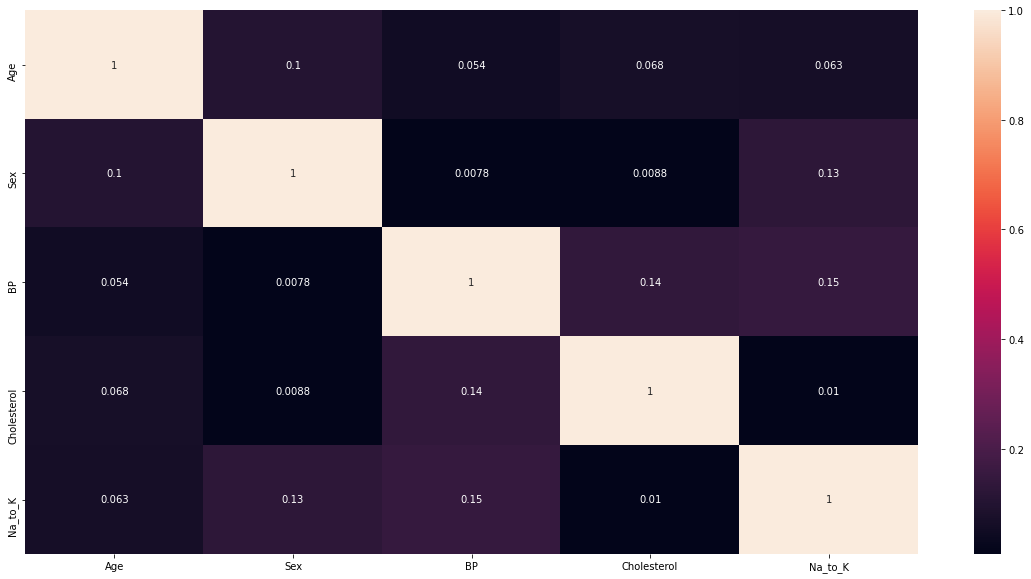

In [82]:
plt.figure(figsize=(20, 10))
sns.heatmap(my_data.corr().abs(),  annot=True)

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [83]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [84]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [85]:
y_trainset.shape

(140, 1)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [86]:
# your code



<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


Print the shape of X_testset and y_testset. Ensure that the dimensions match


In [87]:
# your code



<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


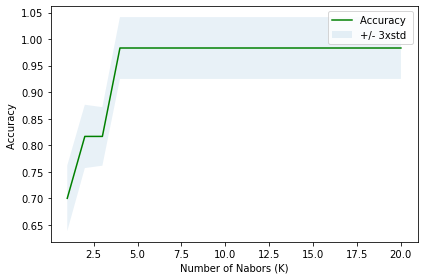

In [88]:
list1 = [];     
mean_acc=np.zeros(20)
std_acc = np.zeros(20)
for n in range(1,21):
    drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=n).fit(X_trainset,y_trainset)
    predTree=drugTree.predict(X_testset)
    mean_acc[n-1]=metrics.accuracy_score(y_testset,predTree)
    std_acc[n-1]=np.std(predTree==y_testset)/np.sqrt(predTree.shape[0])
    list1.append(mean_acc[n-1])
    
        
plt.plot(range(1,21),mean_acc,'g')
plt.fill_between(range(1,21),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [89]:
print( "The best accuracy was achived by", mean_acc.max(), "with n=", mean_acc.argmax()+1)


The best accuracy was achived by 0.9833333333333333 with n= 4


In [90]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [91]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [92]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [93]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
[['drugY']
 ['drugX']
 ['drugX']
 ['drugX']
 ['drugX']]


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Lets visualize the tree
</div>


In [95]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

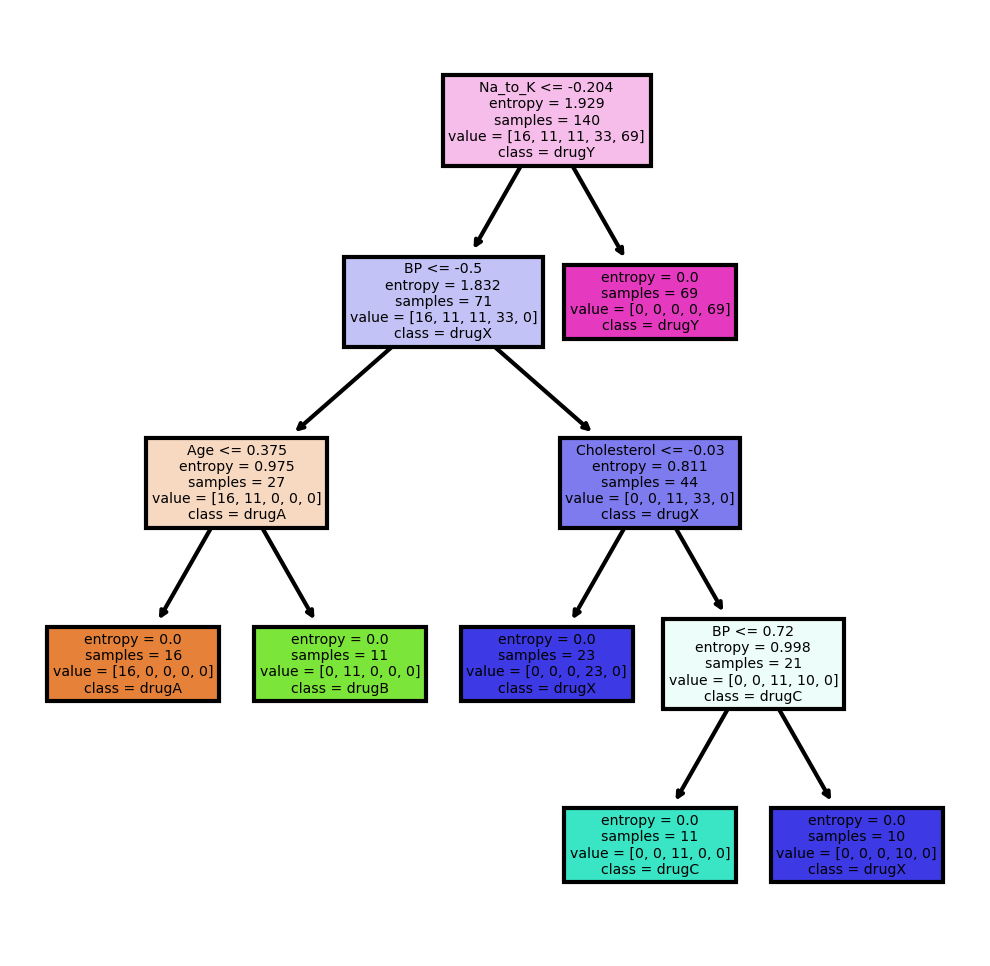

In [96]:
from sklearn import tree
fn=['Age', 'Sex', 'Cholesterol', 'Na_to_K','BP']
cn=['drugA','drugB','drugC','drugX','drugY']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(drugTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [62]:
drugTree.feature_importances_

array([0.09749785, 0.        , 0.05454991, 0.51836744, 0.3295848 ])

In [98]:
from sklearn.ensemble import RandomForestClassifier
ForestModel=RandomForestClassifier(max_depth=6)
ForestModel.fit(X_trainset,y_trainset)
y_pred=ForestModel.predict(X_testset)

<ipython-input-98-cf4cf9729614>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ForestModel.fit(X_trainset,y_trainset)


In [99]:
metrics.accuracy_score(y_testset,y_pred)

0.9833333333333333

In [100]:
ForestModel.feature_importances_

array([0.14822789, 0.01670348, 0.05647222, 0.55359433, 0.22500208])

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                   |
| ----------------- | ------- | ---------- | ------------------------------------ |
| 2020-11-20        | 2.2     | Lakshmi    | Changed import statement of StringIO |
| 2020-11-03        | 2.1     | Lakshmi    | Changed URL of the csv               |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab   |
|                   |         |            |                                      |
|                   |         |            |                                      |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
